# Prediction heart disease using machine learning
This notebook looks to using various Python-based machine learning libraries and data science libraries in an attempt to build a machine learning model capable od predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approch:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data cam from the cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/c/heart-disease-uci

## 3. Evaluation

> If we can reach 65% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* target. Diagnosis of heart disease (0 = absence, 1 = present).

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data exploration (explorartory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data.

1. What question(s) are trying to solve ?
2. What kind od data do we have and how do we treat different types ?
3. what's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about theme ?
5. How can you add, change or remove features to get more out of your data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

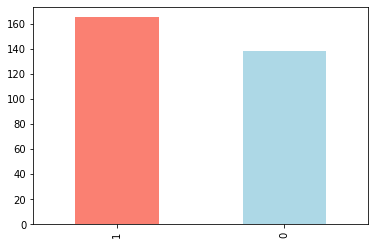

In [7]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any messing data ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency acording to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare traget column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


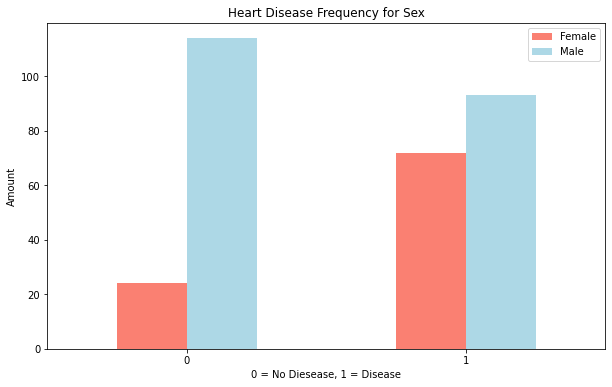

In [13]:
# Create a plot o crossbar
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Diesease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female',"Male"])
plt.xticks(rotation=0);

### Age vs. Heart Rate for Heart Disease

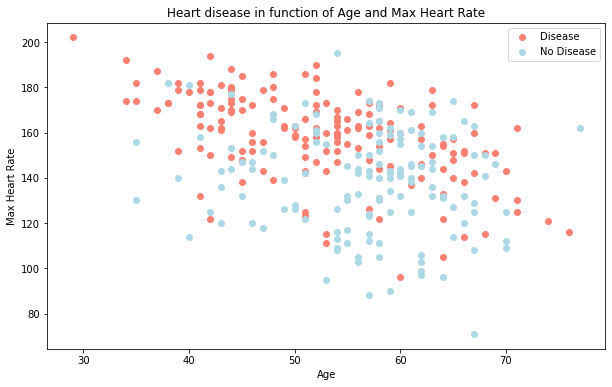

In [14]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positivie examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue')

# Add some helpful info
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

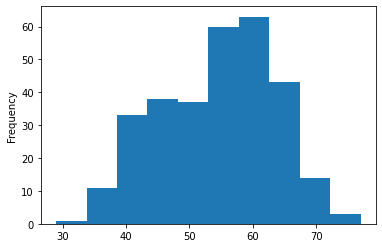

In [15]:
# Check the distribution of the age column with histogram
df['age'].plot.hist();

### Heart Disease Frequency per Chest Pain Type
cp. Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).

In [16]:
 pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


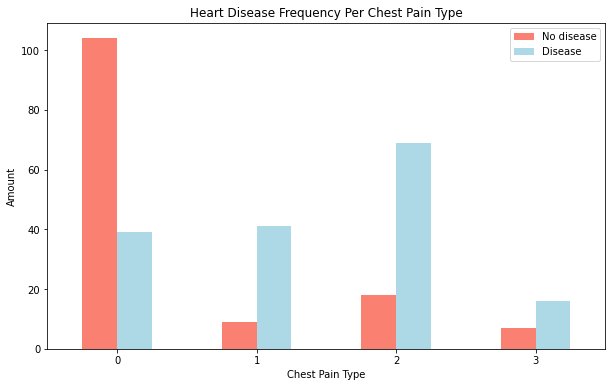

In [17]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


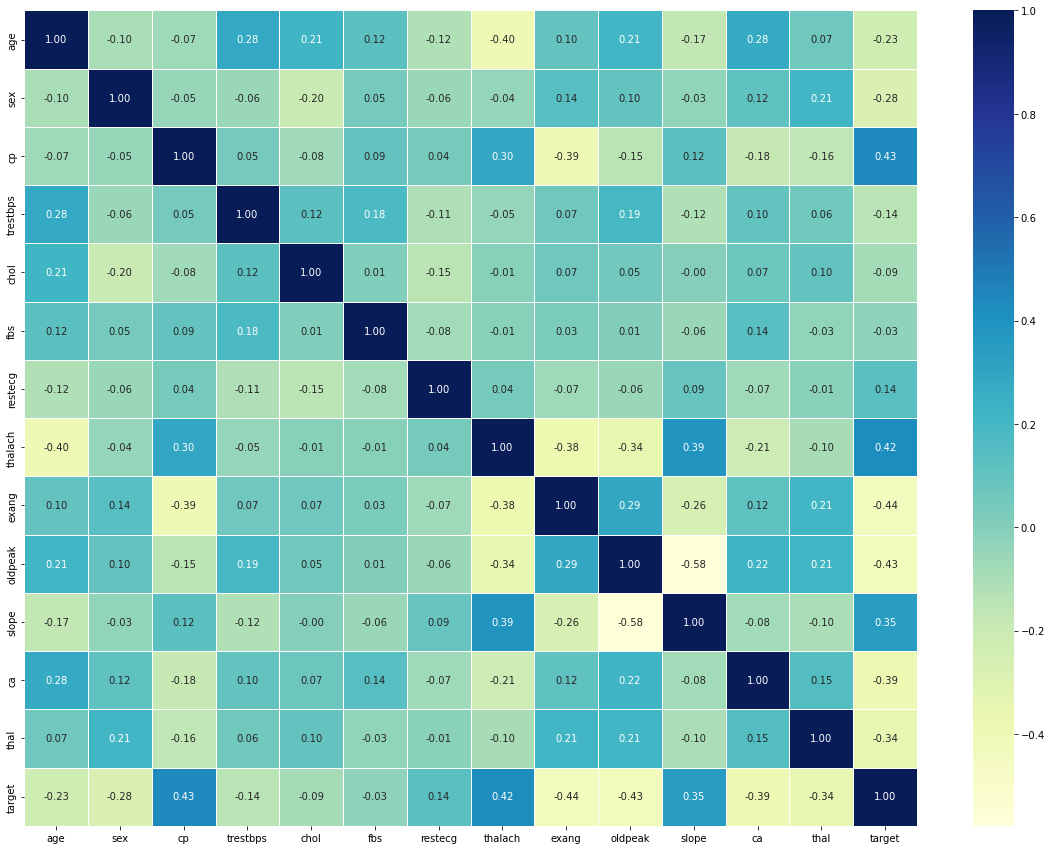

In [19]:
# Let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(20,15))
ax= sns.heatmap(corr_matrix, annot=True, linewidths=0.5,fmt="0.2f", cmap="YlGnBu")

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X and y
X= df.drop('target',axis=1)
y= df['target']

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Split data into train and test sets

np.random.seed(42)

# Split into train & test sets

X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape

(242, 13)

In [26]:
X_test.shape

(61, 13)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

we'll train it (Find the patterns) on the training set.

And we'll test it (use the patterns) on test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put models in a dictionary 
models= {'Logistic Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learing models.
    models: a dict of diffrent Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test: training labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep scores
    models_score={}
    # Loo through models
    for name, model in models.items():
        # Fit the model
        print(f"Training {name} ...")
        model.fit(X_train, y_train)
        # Evaluating the model and append its score to model_scores
        print(f"Scorring {name} ...")
        models_score[name]=model.score(X_test,y_test)
    return models_score

In [28]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                          X_test=X_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

Training Logistic Regression ...
Scorring Logistic Regression ...
Training KNN ...
Scorring KNN ...
Training Random Forest ...
Scorring Random Forest ...


/home/chafik/dev/machine-learning/heart-disease-project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

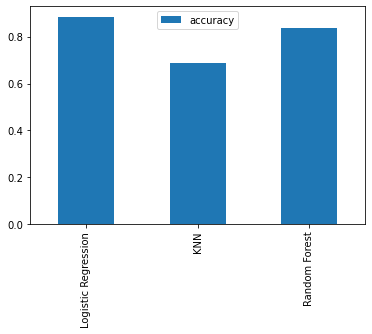

In [29]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

In [30]:
# Try feature scalling
from sklearn.preprocessing import MinMaxScaler
min_max_scaller=MinMaxScaler()
norm=min_max_scaller.fit(X)
X_train_norm=norm.transform(X_train)
X_test_norm=norm.transform(X_test)
fit_and_score(models,X_train_norm,X_test_norm,y_train,y_test)

Training Logistic Regression ...
Scorring Logistic Regression ...
Training KNN ...
Scorring KNN ...
Training Random Forest ...
Scorring Random Forest ...


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.819672131147541,
 'Random Forest': 0.8360655737704918}

Now we've got a besline model... and we know a model's first predictions aren't always what we should based our next steps off.
What should we do ?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [31]:
# Let's tun KNN
train_scores=[]
test_scores=[]

np.random.seed(42)
# Create a lisr of different values for n_neighborsabs
neighbors=range(1,21)

# Setup KNN instance
knn =KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the agorithm
    knn.fit(X_train,y_train)
    
    # Append results on train set to train_scores
    train_scores.append(knn.score(X_train,y_train))
    
    # Append results on test set to test_scores
    test_scores.append(knn.score(X_test,y_test))
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

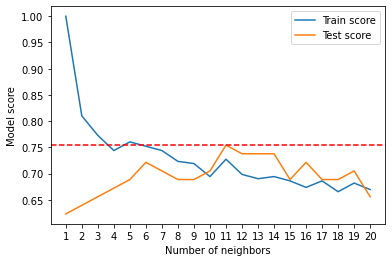

In [33]:
# Let's plot the results
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.axhline(max(test_scores),c='red',linestyle='--');

In [34]:
# Let's tun KNN on normalized data
train_scores=[]
test_scores=[]

np.random.seed(42)
# Create a lisr of different values for n_neighborsabs
neighbors=range(1,21)

# Setup KNN instance
knn =KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the agorithm
    knn.fit(X_train_norm,y_train)
    
    # Append results on train set to train_scores
    train_scores.append(knn.score(X_train_norm,y_train))
    
    # Append results on test set to test_scores
    test_scores.append(knn.score(X_test_norm,y_test))
train_scores

[1.0,
 0.871900826446281,
 0.8884297520661157,
 0.8677685950413223,
 0.8471074380165289,
 0.8471074380165289,
 0.8677685950413223,
 0.8636363636363636,
 0.8636363636363636,
 0.8553719008264463,
 0.8223140495867769,
 0.8181818181818182,
 0.8099173553719008,
 0.8016528925619835,
 0.7933884297520661,
 0.7975206611570248,
 0.7975206611570248,
 0.8057851239669421,
 0.8016528925619835,
 0.8057851239669421]

In [35]:
test_scores

[0.8032786885245902,
 0.7377049180327869,
 0.8360655737704918,
 0.7704918032786885,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.819672131147541,
 0.8360655737704918]

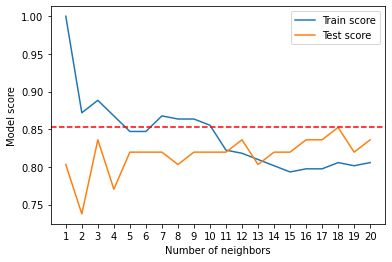

In [36]:
# Let's plot the results
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
plt.axhline(max(test_scores),c='red',linestyle='--');

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [59]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),'solver':["liblinear"],"penalty":['l1','l2']}

# Create a hyperparameter grid from RandomForestClass
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }


Now we've got hyperparamter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [62]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                             verbose=2)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=2)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [64]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                             verbose=2)
# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [42]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
rs_rf.score(X_test,y_test) 

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try to improve them again using GridSearchCV...

In [66]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid= {"C": np.logspace(-4,4,30),
              "solver":['liblinear']}

# Setup grid hyperparameter search for LogiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit grid hyperpameter seach model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [67]:
# Check the best hyperparameter
gs_log_reg.best_estimator_

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [68]:
# Evaluate the grid search LogiticRegression model
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if crosse-validation was used where possible.

To make comparisons and evaluate our trainedmodel, first we need to make predictions.

In [70]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds[:5]

array([0, 1, 1, 0, 1])

/home/chafik/dev/machine-learning/heart-disease-project/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


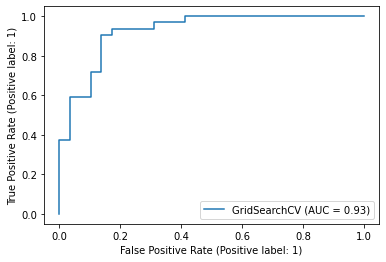

In [71]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,X_test,y_test)

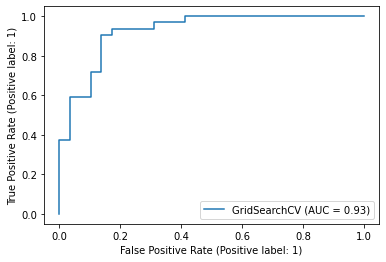

In [73]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

In [76]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


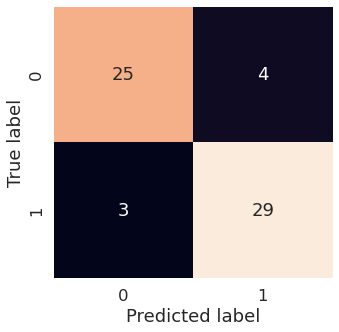

In [80]:
sns.set(font_scale=1.5) 
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_preds)

## Calcumate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [81]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [86]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc.mean()

0.8446994535519124

In [88]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision.mean()

0.8207936507936507

In [89]:
# Cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall.mean()

0.9212121212121213

In [90]:
# Cross-validated f1
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1.mean()

0.8673007976269721

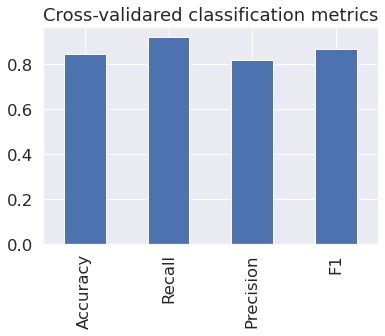

In [100]:
# Visualise cross-validated metrics
cv_metrics= pd.DataFrame({'Accuracy':cv_acc.mean(),
                        'Recall':cv_recall.mean(),
                        "Precision":cv_precision.mean(),
                        "F1":cv_f1.mean()},index=[0])
cv_metrics.T.plot.bar(title='Cross-validared classification metrics',legend=False);

## Feature importance

Feature importance is another as asking, **"which features contributed to the outcomes of the model and how did they contribe ?"**

Finding feature importance is diffrent for each machine learning model.

In [102]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044581,  0.66067072, -0.01156993, -0.00166374,
         0.04386131,  0.31275786,  0.02459361, -0.60413038, -0.56862852,
         0.45051616, -0.63609863, -0.67663375]])

In [107]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672722424428406,
 'sex': -0.8604458059574315,
 'cp': 0.6606707243247576,
 'trestbps': -0.011569930653696374,
 'chol': -0.001663741921349816,
 'fbs': 0.04386130854448035,
 'restecg': 0.31275786449849047,
 'thalach': 0.02459360855083777,
 'exang': -0.6041303752878863,
 'oldpeak': -0.5686285175755658,
 'slope': 0.4505161583706669,
 'ca': -0.636098632514725,
 'thal': -0.676633752836645}

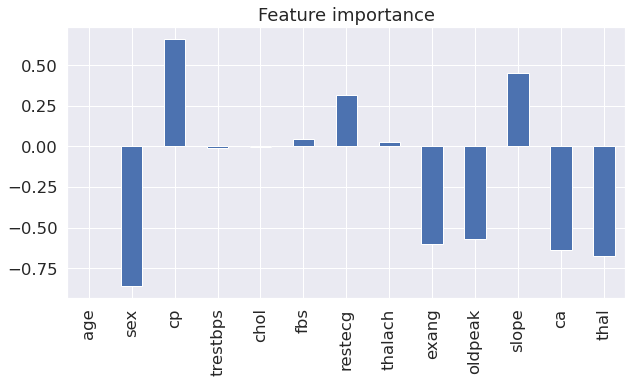

In [114]:
feature_importance=pd.DataFrame(feature_dict,index=[0])
feature_importance.T.plot.bar(figsize=(10,5),title='Feature importance', legend=False);

In [115]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## 6. Experimentation

if you haven't hit your evaluation metruc yet ... ask yourself..

* Could you collect more data ?
* Could you try a better model ? like CatBoost or XGBoost ?
* Could you improve the current models ? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?
